# Online Course Lead Generation #

## Problem Statement ##
An education company named X-Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now although X Education gets a lot of leads,its lead conversion rate is very poor. For example if they say they acquire 100 leads in a day,only about 30 of them are converted.

### Goals ###
1. X Education has appointed you to help them select the most promising leads i.e the leads that are most likely to convert into paying customers.
2. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [19]:
leads_df = pd.read_csv('/Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Analyzing data sets 

In [20]:
print(leads_df.size)
print("") # empty line

print("Shape: " + str(leads_df.shape))
print("")

print("dtypes: " + str(leads_df.dtypes))
print("") 

print(leads_df.columns)
print("")

341880

Shape: (9240, 37)

dtypes: Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            obj

In [21]:
print("describe: " + str(leads_df.describe()))     
print("")

describe:          Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000           

# Data Cleaning

1. Removing Nan Values

In [22]:
# As select means that the values have not been selected by the user, Converting them to NaN will help to analyse it correctly.
leads_df = leads_df.replace('Select', np.nan)

In [23]:
# Check column-wise null count
leads_df.isnull().sum(axis = 0) #isnull() used to detect missing values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [24]:
# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) #round for 2 decimal places

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [25]:
#dropping cols with more than 40% missing values

cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, 1, inplace = True)

#Print Columns to check 
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [26]:
# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) # round for 2 decimal places

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [27]:
# Checking Country Column values
leads_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Sweden                     3
Philippines                2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Russia                     1
Indonesia                  1
Tanzania                   1
Sri Lanka                  1
Malaysia                   1
Denmark                    1
Kenya         

###### It can be seen that India has highest number of records. hence imputing NAN values with India ######

In [28]:
leads_df['Country'] = leads_df['Country'].replace(np.nan,'India') #Replace Nan with India

In [29]:
# Checking Country Column values
leads_df.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Sweden                     3
Philippines                2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Russia                     1
Indonesia                  1
Tanzania                   1
Sri Lanka                  1
Malaysia                   1
Denmark                    1
Kenya         

In [30]:
#As can be seen the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped
leads_df.drop('Country',axis=1,inplace=True)

In [31]:
#checking City Column Value Count
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
# As Mumbai has highest value, imputing Nan with mumbai
leads_df['City'] = leads_df['City'].replace(np.nan,'Mumbai')

#checking City Column Value Count
leads_df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
#checking value counts of Specialization column
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
# As Specialisation is not specified and we dont have any value high enough to impute, Lets use Not Specified for Nan
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')

#checking value counts of Specialization column
leads_df['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [35]:
#combining Management Specializations 
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                               'Marketing Management','Operations Management',
                                                               'IT Projects Management','Supply Chain Management',
                                                               'Healthcare Management','Hospitality Management',
                                                               'Retail Management'] ,'Management_Specializations') 

In [36]:
#checking value counts of Specialization column
leads_df['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
#checking value counts of Last Notable Activity column
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [38]:
#clubbing lower frequency values
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam','Unreachable','Unsubscribed',
                                                                       'Email Bounced', 'Resubscribed to emails',
                                                                       'View in browser link Clicked','Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [39]:
#checking value counts of Last Notable Activity column
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [40]:
#Checking values for What is your current occupation
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
#imputing Nan values with mode "Unemployed"
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

#Checking values for What is your current occupation
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
# Now check the value counts for 'What matters most to you in choosing a course' column there
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
# Since Better Career Prospects makes the whole data frame, dropping it from the list
leads_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [44]:
#checking value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [45]:
#replacing Nan values with "Not Specified" as Dataframe has a mixture of value counts
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not Specified')

In [46]:
# Also converting small amounts into Others
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP',                                             
                                             'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup',
                                    'Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student',
                                    'Interested in Next batch','Recognition issue (DEC approval)',
                                    'Want to take admission but has financial problems','University not recognized',
                                    'switched off','Already a student','Not doing further education',
                                    'invalid number','wrong number given', 'Interested  in full time MBA'], 'Other_Tags')

#checking value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [47]:
#checking Lead Source column values
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
testone                 1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

In [48]:
# We can Replace Nan with others as value count is small
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Others')

# changing google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

# we can also convert small values of Lead Source into others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')     

#checking Lead Source column values
leads_df['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                57
Facebook              55
Social Media           2
Name: Lead Source, dtype: int64

In [49]:
# Checking Last Activity value count
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
# We can Replace Nan with others as value count is small
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Others')

# we can also convert small values of last activity into others
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

# Checking Last Activity value count
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [51]:
#It seems to be "Last activity" and "Last Notable Activity" columns are same so we dropped Last Activity
leads_df.drop('Last Activity',axis=1,inplace=True)

In [52]:
# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) # round for 2 decimal places

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [53]:
#Drop all rows which have Nan Values as the % of Nan is very very small
leads_df.dropna(inplace=True)

# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) # round for 2 decimal places

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

__Checking Lead Number and ProspectsId column for duplicates and as they are just ID, so can be dropeed__

In [54]:
print("No Duplicates in ProspectId: " +  str(sum(leads_df.duplicated(subset = 'Prospect ID')) == 0))
print("No Duplicates in lead Number: " + str(sum(leads_df.duplicated(subset = 'Lead Number')) == 0))

No Duplicates in ProspectId: True
No Duplicates in lead Number: True


In [55]:
#Dropping Lead Number and Prospects Id columns
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

#Print Columns to check 
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Exploratory Data Analysis

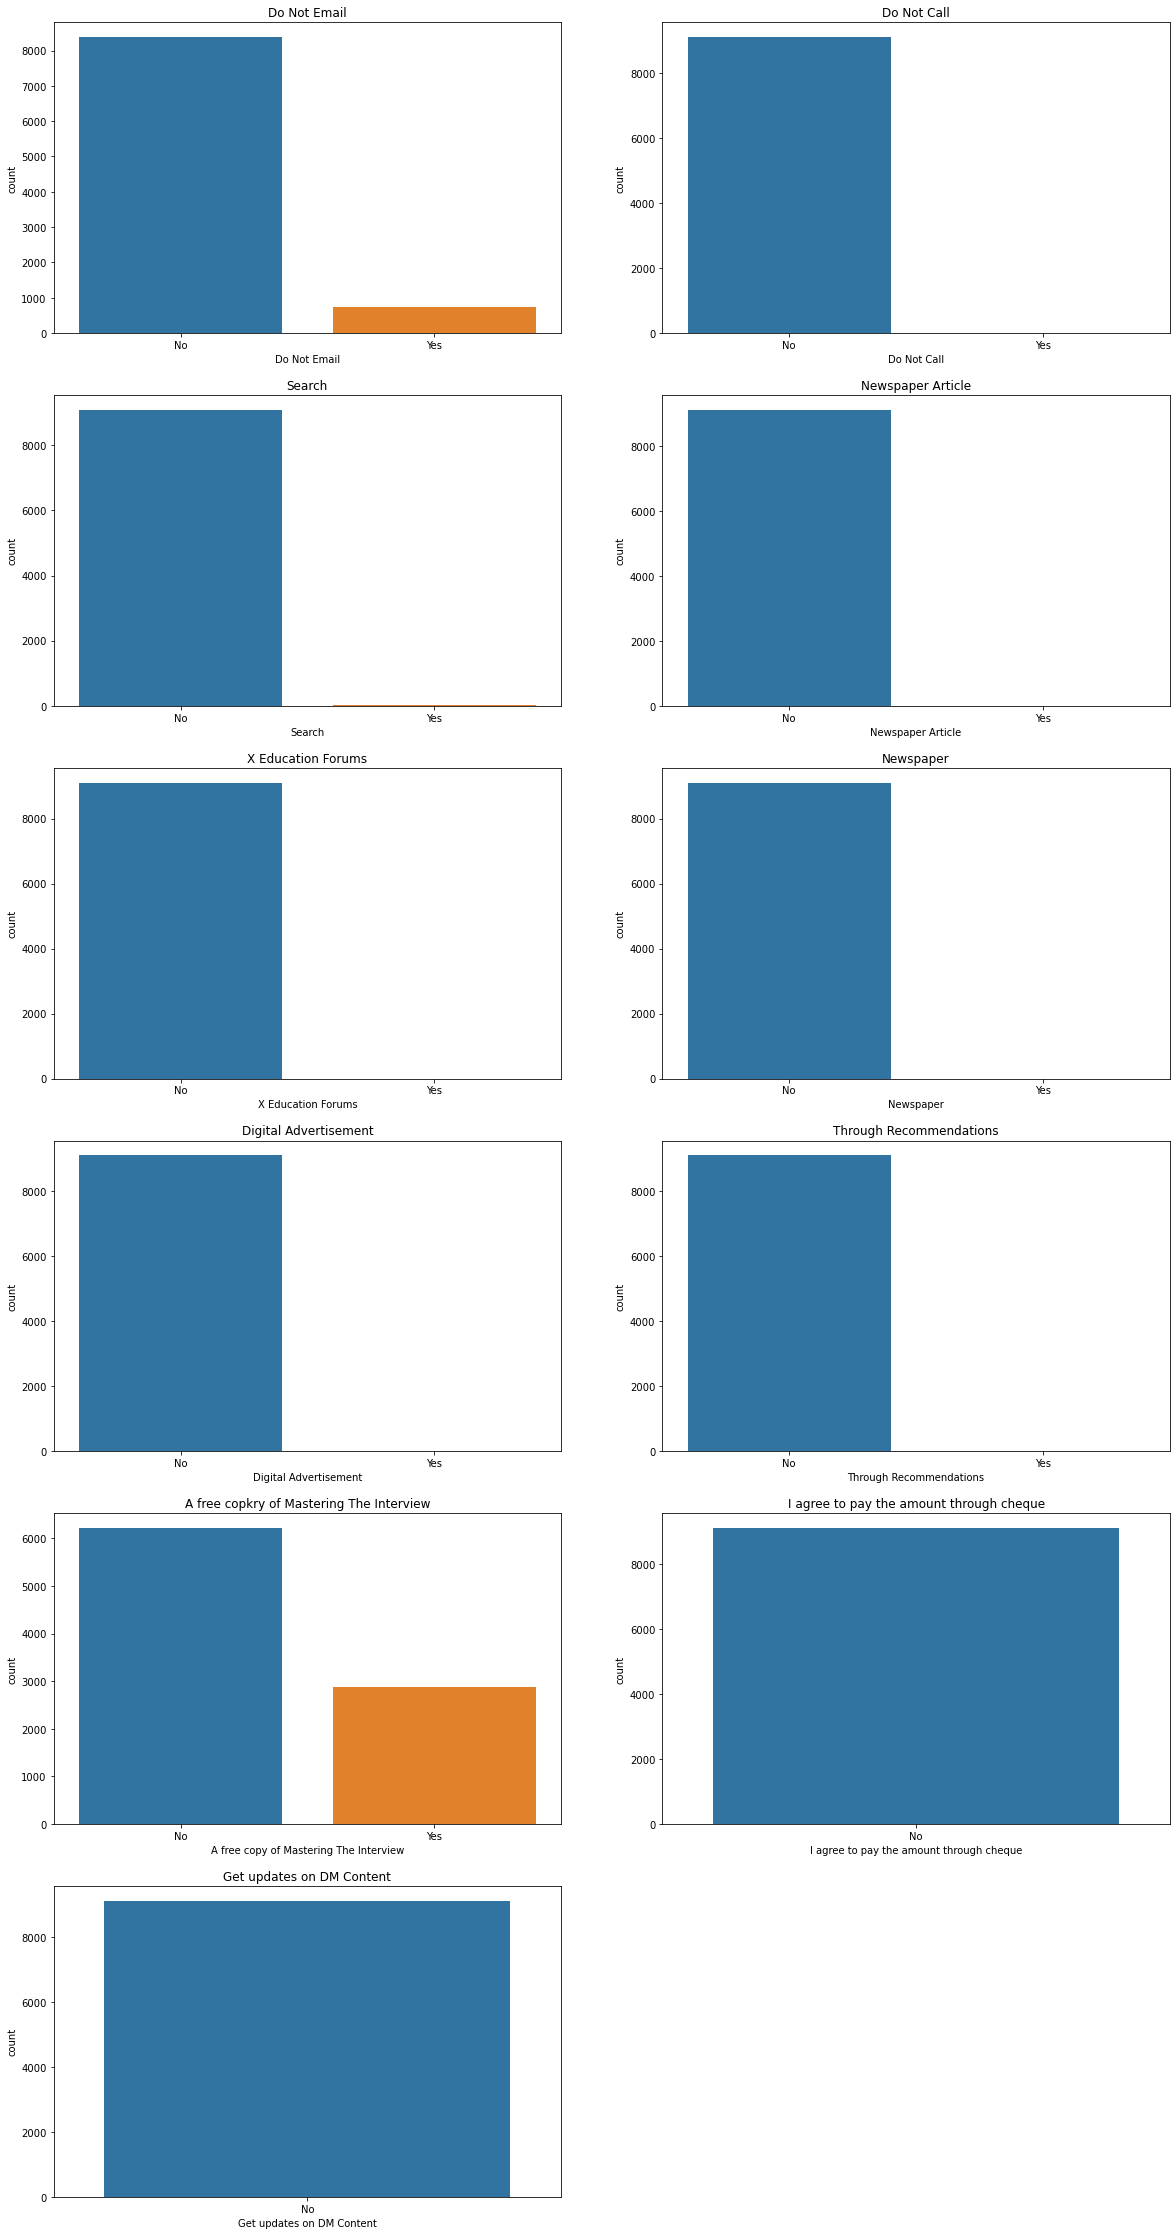

In [56]:
plt.figure(figsize = (20,40))
#The subplots() function takes three arguments that describes the layout of the figure.
#countplot() method is used to Show the counts of observations in each categorical bin using bars.

plt.subplot(6,2,1) #the figure has 6 row, 2 columns, and this plot is the second plot.
sns.countplot(leads_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,2) #the figure has 6 row, 2 columns, and this plot is the third plot.
sns.countplot(leads_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,3) #the figure has 6 row, 2 columns, and this plot is the fourth plot.
sns.countplot(leads_df['Search'])
plt.title('Search')

plt.subplot(6,2,4) #the figure has 6 row, 2 columns, and this plot is the fifth plot.
sns.countplot(leads_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,5) #the figure has 6 row, 2 columns, and this plot is the sixth plot.
sns.countplot(leads_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,6)
sns.countplot(leads_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,7)
sns.countplot(leads_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,8)
sns.countplot(leads_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,9)
sns.countplot(leads_df['A free copy of Mastering The Interview'])
plt.title('A free copkry of Mastering The Interview')

plt.subplot(6,2,10)
sns.countplot(leads_df['I agree to pay the amount through cheque'])
plt.title('I agree to pay the amount through cheque')

plt.subplot(6,2,11)
sns.countplot(leads_df['Get updates on DM Content'])
plt.title('Get updates on DM Content')

plt.show()

Text(0.5, 0.98, 'Boxplot of Leads Data')

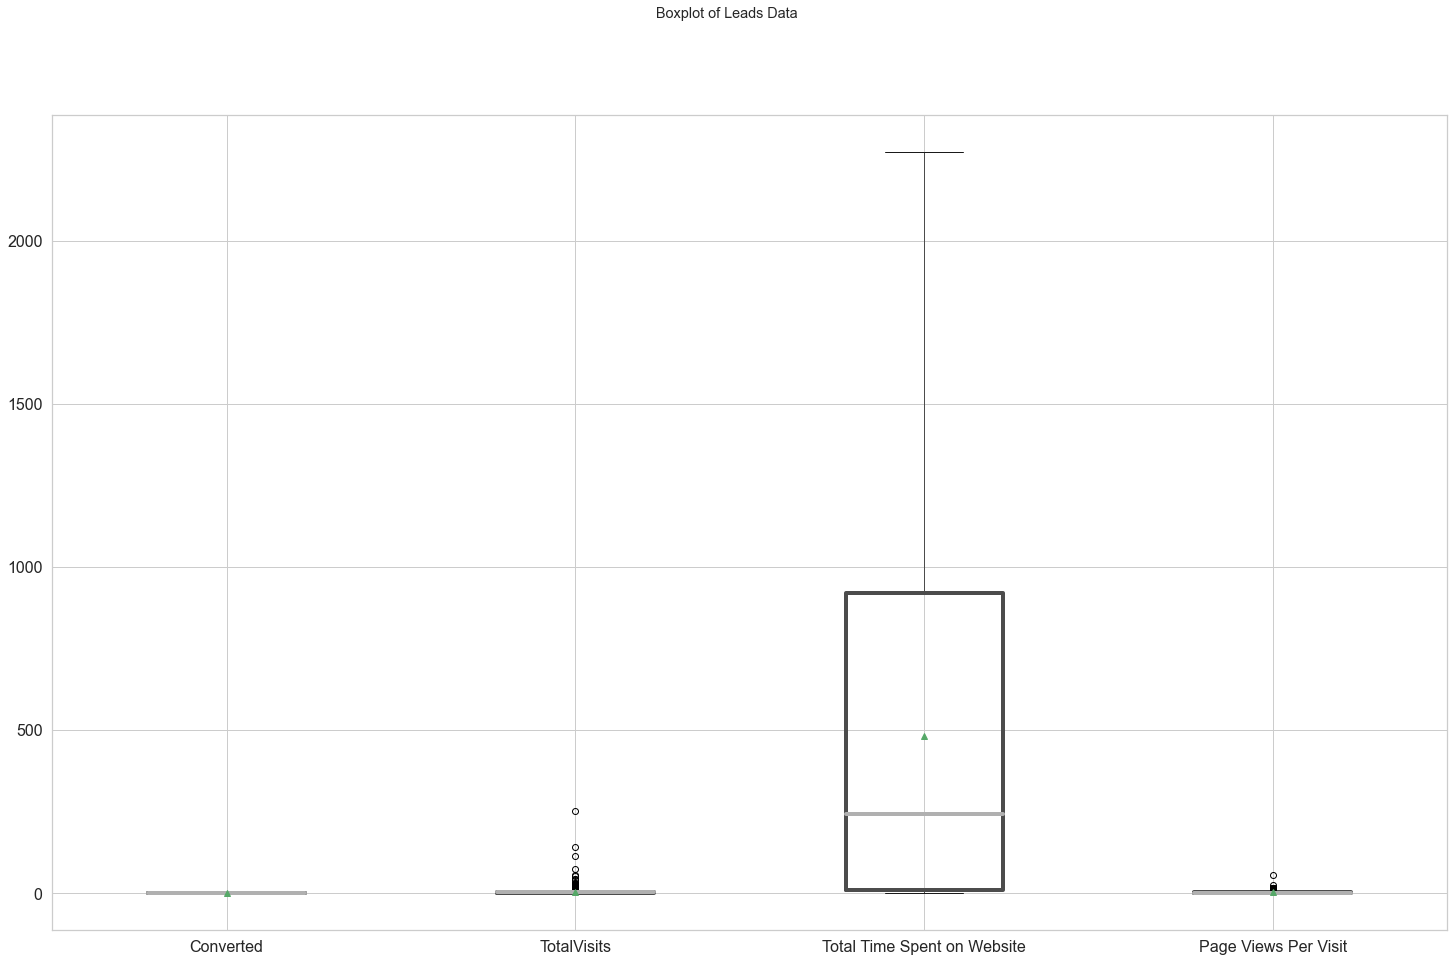

In [57]:
sns.set(style="whitegrid")
#ax = sns.boxplot(y="gdpp",data=countries_df)
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
leads_df.boxplot(figsize=(25,15), fontsize=16,boxprops=boxprops, medianprops=medianprops,showfliers=True, showmeans=True)

plt.suptitle("Boxplot of Leads Data")


#### TotalVisits and Page Views Per Visit columns seem to be having outliers

### Checking for Imbalanced Columns

In [58]:
leads_df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [59]:
# There is high value of No compared to Yes and hence dropping search column
leads_df.drop('Search',axis=1,inplace=True)

In [60]:
leads_df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [61]:
# There is high value of No compared to Yes and hence dropping Do Not Call column
leads_df.drop('Do Not Call',axis=1,inplace=True)

In [62]:
leads_df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [63]:
# There is high value of No and hence dropping Magazine column
leads_df.drop('Magazine',axis=1,inplace=True)

In [64]:
leads_df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [65]:
# There is high value of No compared to Yes and hence dropping Newspaper Article column
leads_df.drop('Newspaper Article',axis=1,inplace=True)

In [66]:
leads_df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [67]:
# There is high value of No and hence dropping X Education Forums column
leads_df.drop('X Education Forums',axis=1,inplace=True)

In [68]:
leads_df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [69]:
# There is high value of No compared to Yes and hence dropping Newspaper  column
leads_df.drop('Newspaper',axis=1,inplace=True)

In [70]:
leads_df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [71]:
# There is high value of No compared to Yes and hence dropping Digital Advertisement  column
leads_df.drop('Digital Advertisement',axis=1,inplace=True)

In [72]:
leads_df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [73]:
# There is high value of No compared to Yes and hence dropping Through Recommendations column
leads_df.drop('Through Recommendations',axis=1,inplace=True)

In [74]:
leads_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [75]:
# There is high value of No  and hence dropping Receive More Updates About Our Courses  column
leads_df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [76]:
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [77]:
# There is high value of No  and hence dropping Update me on Supply Chain Content  column
leads_df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [78]:
leads_df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [79]:
# There is high value of No and hence dropping and hence dropping Get updates on DM Content column
leads_df.drop('Get updates on DM Content',axis=1,inplace=True)

In [80]:
leads_df['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [81]:
# There is high value of No and hence dropping I agree to pay the amount through cheque  column
leads_df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [82]:
#Print Columns to check 
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

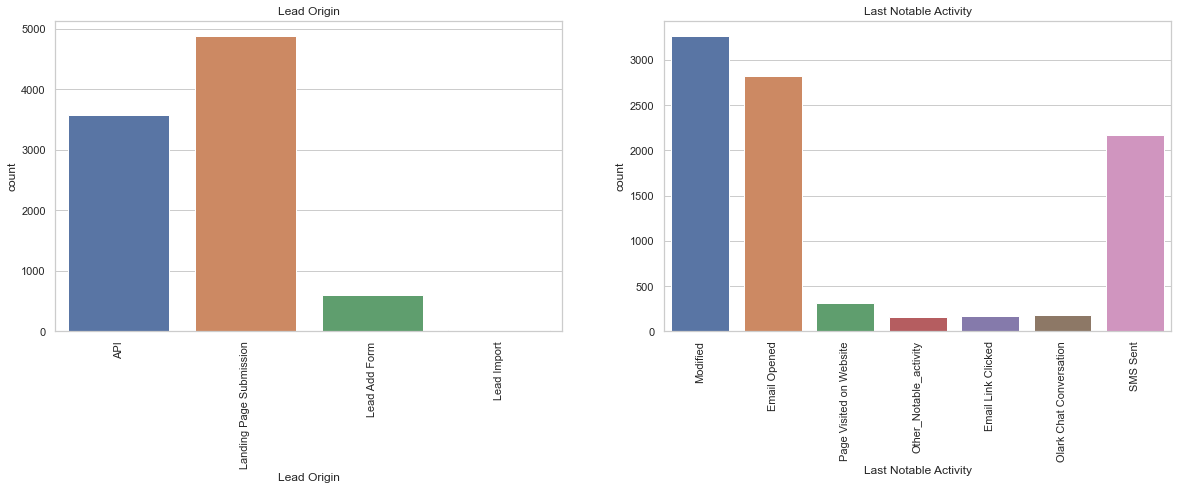

In [83]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_df['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

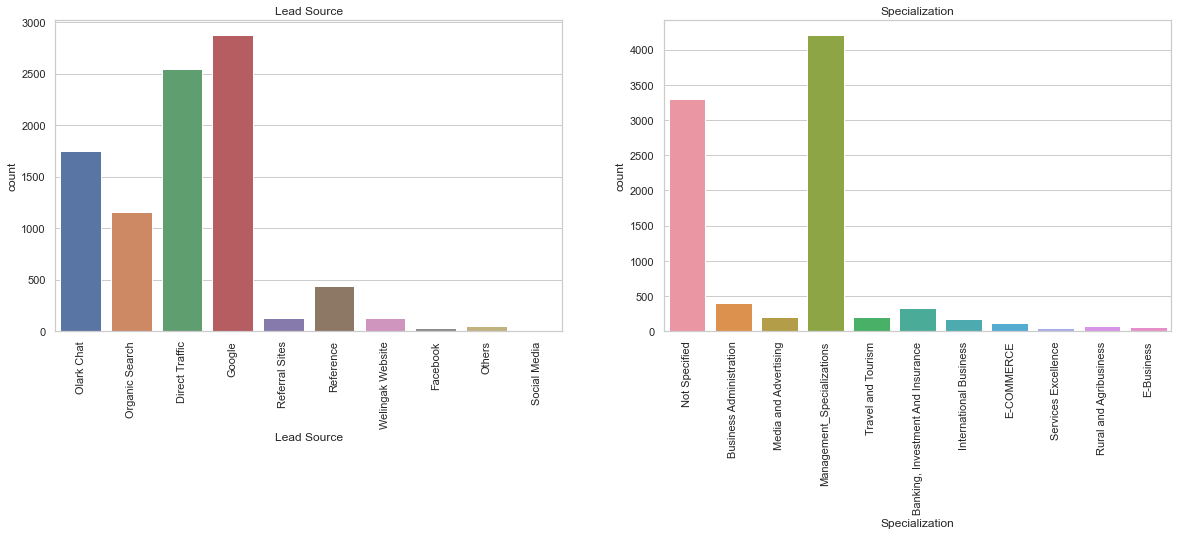

In [84]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(6,2,2)
sns.countplot(leads_df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.show()

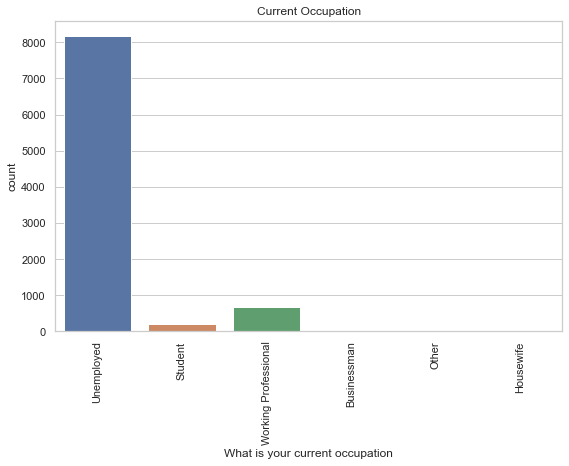

In [85]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.show()

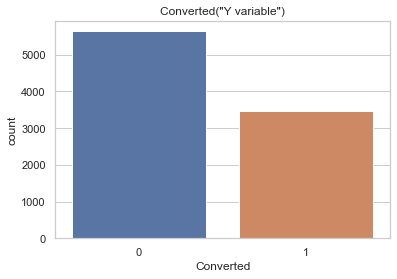

In [86]:
# Response Variable
sns.countplot(leads_df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Relating all Categorical varialbe with converted ###

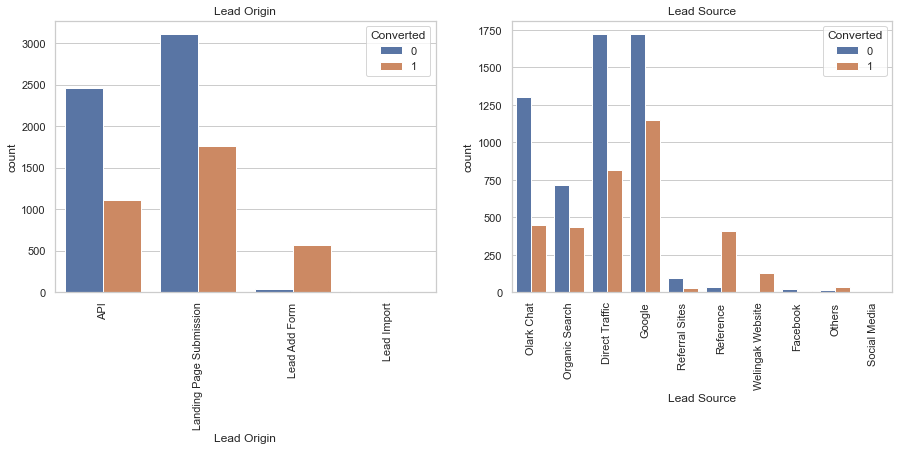

In [87]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


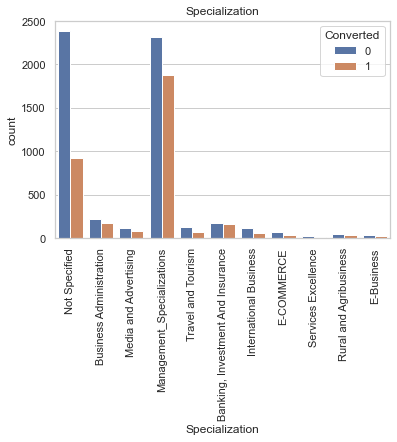

In [88]:
sns.countplot(x='Specialization', hue='Converted', data= leads_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

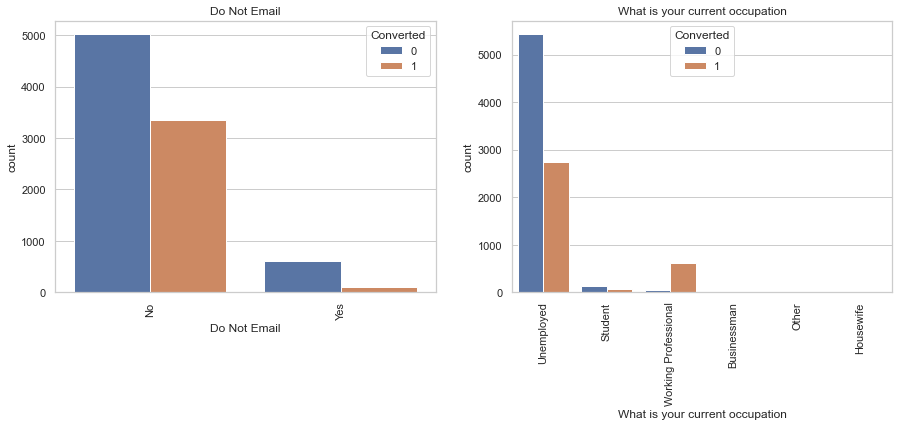

In [89]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

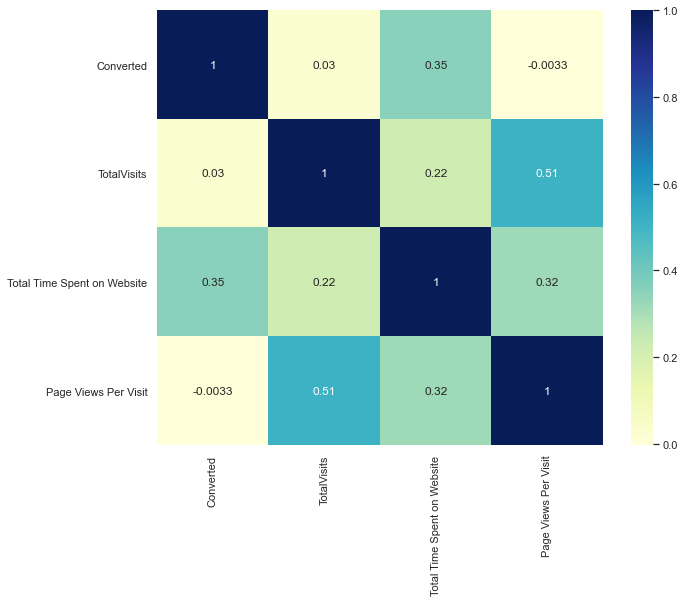

In [90]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [91]:
numeric = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
99%,17.000000,1838.960000,9.000000
max,251.000000,2272.000000,55.000000


## Dummy Variable Creation

In [92]:
# Get the categorical columns from the columns list- using object type
categorical_cols= leads_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [94]:
leads_df=pd.get_dummies(leads_df)
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [95]:
#Check Data
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Standard Scaler ###

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(leads_df[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,-0.709687,-0.883153,-1.093241,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0.320267,0.353463,0.063471,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,-0.297706,1.927670,-0.167871,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,-0.503696,-0.323557,-0.630556,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,1,-0.297706,1.736857,-0.630556,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## Train-Test Split ##

In [97]:
# Put all the feature variables in X
X = leads_df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,-0.709687,-0.883153,-1.093241,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.320267,0.353463,0.063471,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,-0.297706,1.927670,-0.167871,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,-0.503696,-0.323557,-0.630556,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,-0.297706,1.736857,-0.630556,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [98]:
# Put the target variable in y
Y = leads_df['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6372 non-null   float64
 1   Total Time Spent on Website                           6372 non-null   float64
 2   Page Views Per Visit                                  6372 non-null   float64
 3   Lead Origin_API                                       6372 non-null   uint8  
 4   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 6   Lead Origin_Lead Import                               6372 non-null   uint8  
 7   Lead Source_Direct Traffic                            6372 non-null   uint8  
 8   Lead Source_Facebook                                  6

# Model Building

##  1 . KNN Classifier ##

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

for i in range(1, 15, 2):
    print('K = {}'.format(i))
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit( X_train , y_train )
    y_pred = knn.predict(X_test)

    print(f1_score(y_test, y_pred,average="weighted"))

K = 1
0.9001083049442244
K = 3
0.897566056362769
K = 5
0.8973161874515061
K = 7
0.8987257858935138
K = 9
0.9019560825186501
K = 11
0.9008141552862253
K = 13
0.8985997724244558


In [101]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1550  139]
 [ 129  913]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1689
           1       0.87      0.88      0.87      1042

    accuracy                           0.90      2731
   macro avg       0.90      0.90      0.90      2731
weighted avg       0.90      0.90      0.90      2731

0.9018674478213109


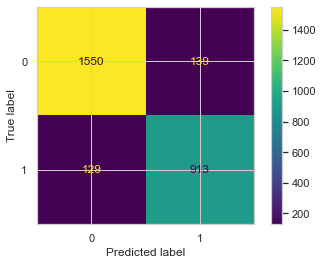

In [102]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,labels=[0,1])
plt.show()

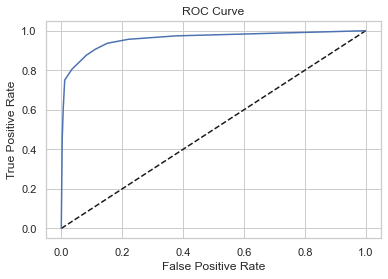

0.9582544953288127

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

roc_auc_score(y_test, y_pred_prob)

## 2 . Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
# Fit the classifier to the training data
logreg.fit(X_train,y_train)

LogisticRegression()

In [105]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[1626   63]
 [ 122  920]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1689
           1       0.94      0.88      0.91      1042

    accuracy                           0.93      2731
   macro avg       0.93      0.92      0.93      2731
weighted avg       0.93      0.93      0.93      2731

0.9322592456975467


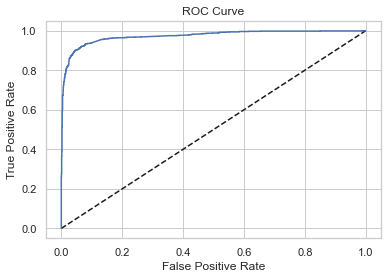

0.9731283147474513

In [106]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)


##### For Logistic Regression we are getting ROC score 0.97 indicating a good model #####

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1','l2','elastic']}

logreg = LogisticRegression(solver='saga')

# Instantiate the GridSearchCV object: logreg_cv
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)
logreg_cv = GridSearchCV(logreg, param_grid, cv=kfold,scoring="roc_auc")

# Fit it to the data
logreg_cv.fit(X,Y)

print(logreg_cv.best_score_)
print(logreg_cv.best_params_)

best_model = logreg_cv.best_estimator_

0.9712702123746372
{'penalty': 'l1'}


## 3. Random Forest Classifier ##

In [108]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=2020,n_estimators=500,oob_score=True)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)

In [109]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1623   66]
 [ 120  922]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1689
           1       0.93      0.88      0.91      1042

    accuracy                           0.93      2731
   macro avg       0.93      0.92      0.93      2731
weighted avg       0.93      0.93      0.93      2731

0.931893079458074


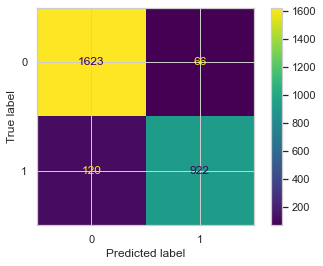

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_rf, X_test, y_test)
plt.show() 

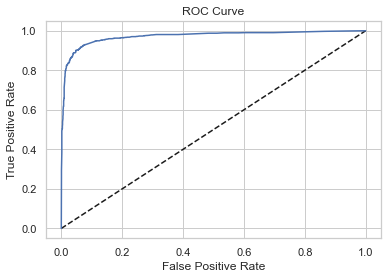

0.9715325198955872

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

## Checking for any overfit using Cross Validation score for Logistic Regression ##

In [112]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(logreg, X, Y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.90659341 0.91868132 0.91978022 0.92535675 0.92864984 0.92864984
 0.92967033 0.93186813 0.93296703 0.94725275]
0.9269469608328006


__Cross Validation score is 0.92, which projects that the train test data was not overfit__

# Conclusion #

Model has following characteristics:
- The overall accuracy score is above 95%
- F1 score was above 90%, providing high model accuracy
- We have checked that model is not overfitting using cross value score of 0.91